In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
def get_unit_price_comparison_data(df, sorting_value='ratio_mini_lt_full'):
    '''
    Preprocessing required to compare mini and standard size products with one another 
    Args:
    Returns:
    '''
    # for each product, compare all mini size to standard using cross join
    df_compare = df[df['swatch_group']=='mini size'].merge(
        df[df['swatch_group']=='standard size'],
        on=['product_id','product_name','brand_name'],
        suffixes=('_mini','_standard')
    )
    # only calculate ratio in one direction 
    df_compare = df_compare[df_compare['amount_adj_mini']<df_compare['amount_adj_standard']]
    # if ratio < 1, mini is better value per oz, if ratio > 1, standard is better value
    df_compare['mini_to_standard_ratio'] = df_compare['unit_price_mini'] / df_compare['unit_price_standard']
    df_compare = df_compare.reset_index().rename(columns={'index':'prod_rank'})

    # df_compare = sort_product_comparison_data(df_compare, sorting_value)

    df_compare = df_compare.melt(['product_id','brand_name','product_name',
                                'prod_rank','amount_adj_mini', 'amount_adj_standard',
                                'mini_to_standard_ratio'])
    df_compare = df_compare[df_compare['variable'].isin(['unit_price_mini','unit_price_standard'])]
    df_compare = df_compare.merge(df, 
                    on=['product_id','brand_name','product_name'],
                    how='left')
    df_compare['pretty_ratio'] = df_compare['mini_to_standard_ratio'].round(2).astype(str)
    df_compare['display_name'] = df_compare['brand_name']+",<br>"+df_compare['lvl_2_cat']+" ("+df_compare['pretty_ratio']+")"
    return df_compare

In [104]:
df = pd.read_csv('../data/agg_prod_data.csv')

# df = get_unit_price_comparison_data(df)

In [26]:
prod_comparisons = df.brand_name.value_counts()
brand_names = prod_comparisons[prod_comparisons>30].index.tolist()

<Axes: xlabel='mini_to_standard_ratio', ylabel='brand_name'>

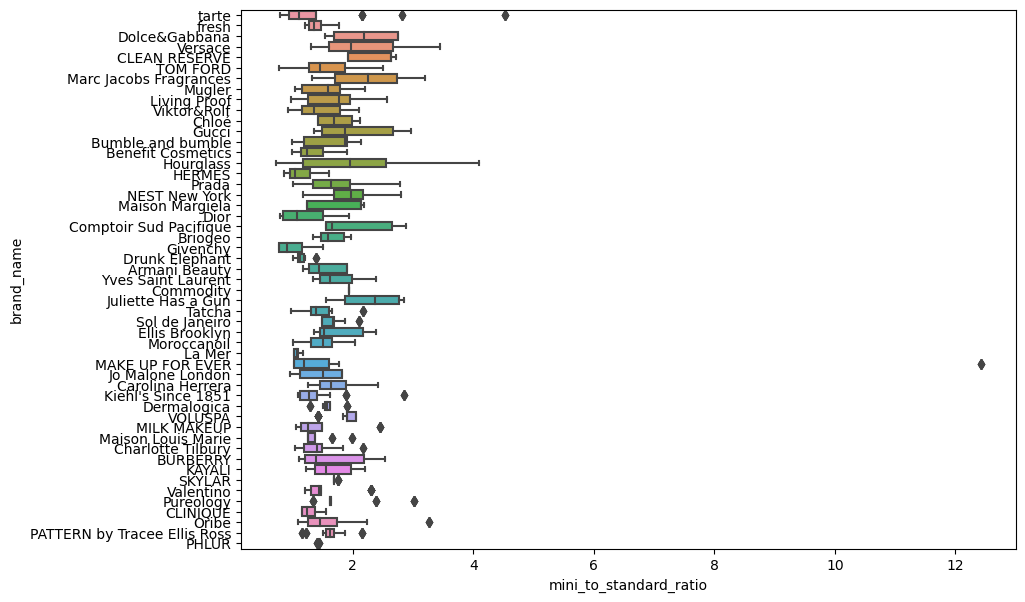

In [27]:
plt.figure(figsize=(10,7))
sns.boxplot(x="mini_to_standard_ratio", y="brand_name", data=df[df['brand_name'].isin(brand_names)])


In [29]:
# df[df['mini_to_standard_ratio']>12]

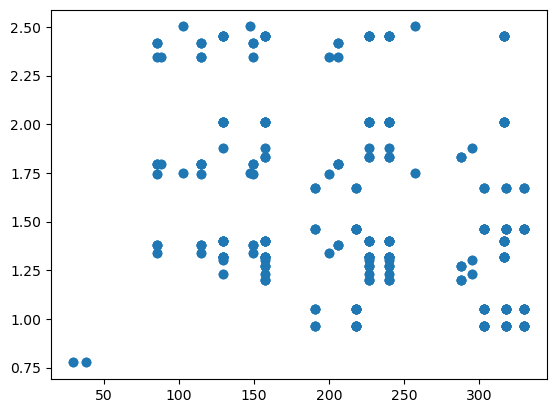

In [36]:
plt.scatter(data=df[df['brand_name']=='TOM FORD'],
            x='unit_price',
            y='mini_to_standard_ratio')

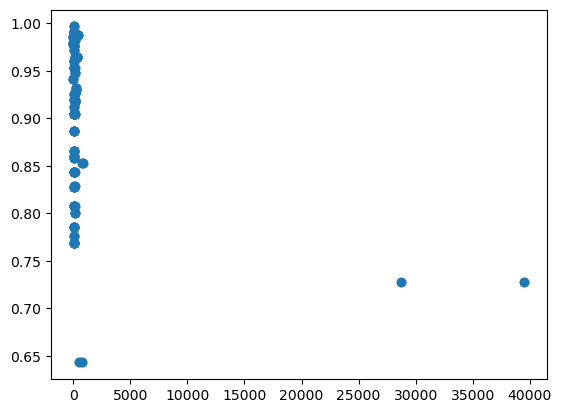

In [40]:
plt.scatter(data=df[df['mini_to_standard_ratio']<1],
            x='unit_price',
            y='mini_to_standard_ratio')

In [41]:
df.columns

Index(['product_id', 'brand_name', 'product_name', 'prod_rank',
       'amount_adj_mini', 'amount_adj_standard', 'mini_to_standard_ratio',
       'variable', 'value', 'index', 'swatch_group', 'amount_a', 'unit_a',
       'price', 'internal_product_id', 'rating', 'product_reviews', 'n_loves',
       'lvl_0_cat', 'lvl_1_cat', 'lvl_2_cat', 'sku', 'amount_b', 'unit_b',
       'product_multiplier', 'amount_adj', 'unit_price', 'prod_size_rank',
       'pretty_ratio', 'display_name'],
      dtype='object')

<Axes: >

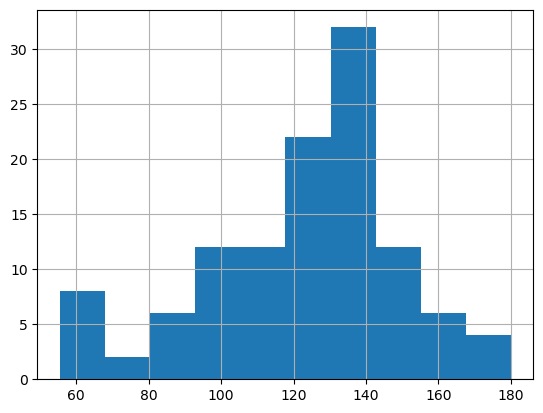

In [45]:
['unit_price'].hist()

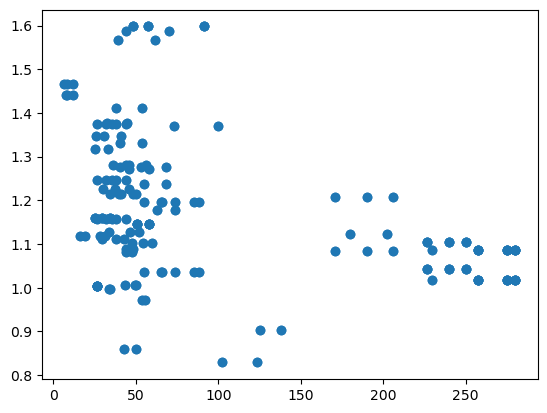

In [53]:
plt.scatter(x='unit_price', y='mini_to_standard_ratio',data=df[df['lvl_2_cat']=='Moisturizers'])

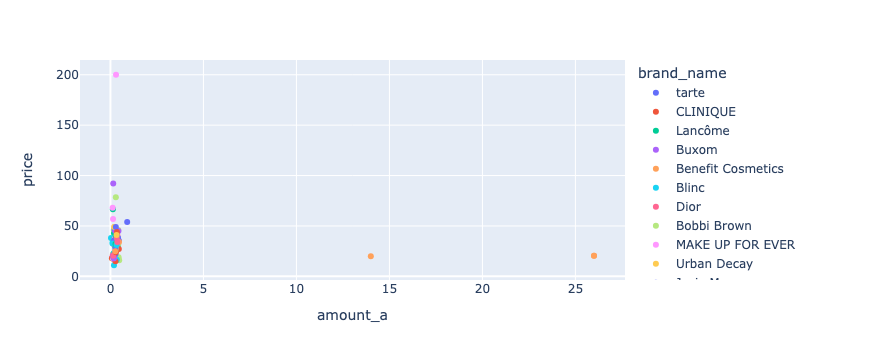

In [67]:
import plotly.express as px
df = pd.read_csv('../data/agg_prod_data.csv')

fig = px.scatter(df[df['lvl_2_cat']=='Mascara'], x="amount_a", y="price",
                 color='brand_name',
                 hover_data=['brand_name', 'product_name', 'index', 'unit_price'],
)
fig.show()

In [58]:
df.columns

Index(['index', 'product_id', 'product_name', 'brand_name', 'swatch_group',
       'amount_a', 'unit_a', 'price', 'internal_product_id', 'rating',
       'product_reviews', 'n_loves', 'lvl_0_cat', 'lvl_1_cat', 'lvl_2_cat',
       'sku', 'amount_b', 'unit_b', 'product_multiplier', 'amount_adj',
       'unit_price', 'prod_size_rank'],
      dtype='object')

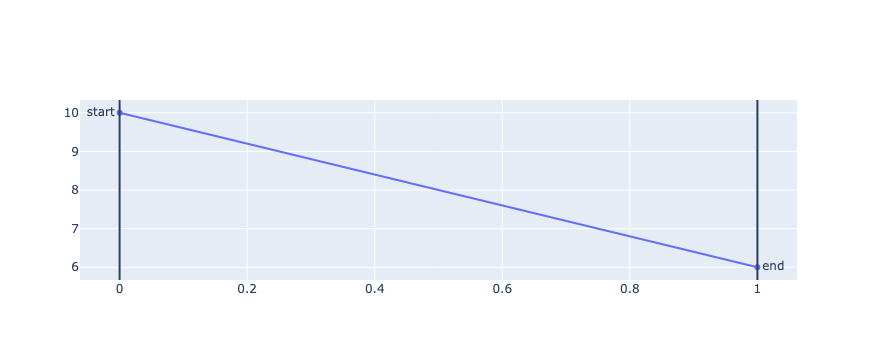

In [68]:
#https://flourish.studio/visualisations/slope-charts/#:~:text=Slope%20charts%20are%20good%20to,don't%20start%20at%200.
import plotly.graph_objects as go
fig = go.Figure(go.Scatter(x=[0, 1], y=[10, 6], mode='lines+markers+text', 
                           text=['start', 'end'], textposition=['middle left', 'middle right']))

fig.add_shape(type='line', x0=0, x1=0, y0=0, y1=1, xref='x', yref='paper')
fig.add_shape(type='line', x0=1, x1=1, y0=0, y1=1, xref='x', yref='paper')
fig.show()

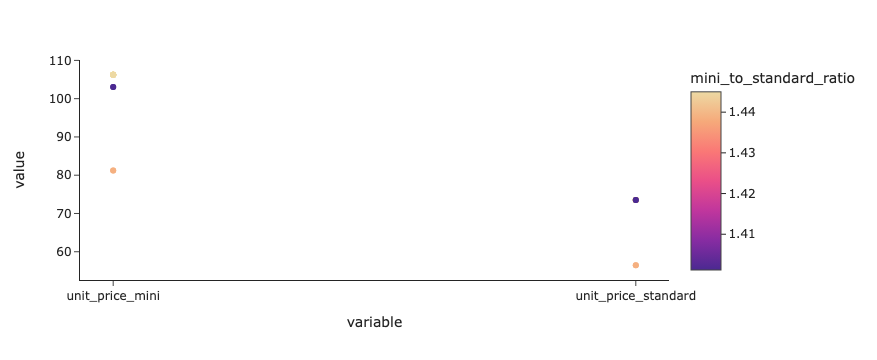

In [87]:
import pandas as pd
import plotly.express as px



# # Create a slope plot using Plotly Express
# fig = px.line(df, x='Category', y=, color='Category', markers=True)

# # Update the layout for better visualization
# fig.update_layout(
#     title='Slope Plot',
#     xaxis_title='X Values',
#     yaxis_title='Y Values',
#     legend_title='Category',
#     xaxis=dict(tickvals=[1, 20], dtick=1),
#     yaxis=dict(tickvals=[1, 20], dtick=1),
# )
PLOT_TEMPLATE_THEME = 'simple_white'

# # Show the plot
# fig.show()
df['mini_to_standard_ratio'] = df['mini_to_standard_ratio'].astype(float)
fig = px.scatter(df[df['brand_name']=='PHLUR'],
                y="value",
                x="variable",
                color="mini_to_standard_ratio",
                color_continuous_scale='agsunset',
                 template=PLOT_TEMPLATE_THEME,
                # hover_data={
                #     "brand_name":True,
                #     "product_name":True,
                #     "amount_adj_mini":':.2f',
                #     "amount_adj_standard":':.2f',
                #     "mini_to_standard_ratio":':.2f',
                #     "prod_rank":False,
                #     "index":True
                # },
                # markers=True
    )

fig.show()

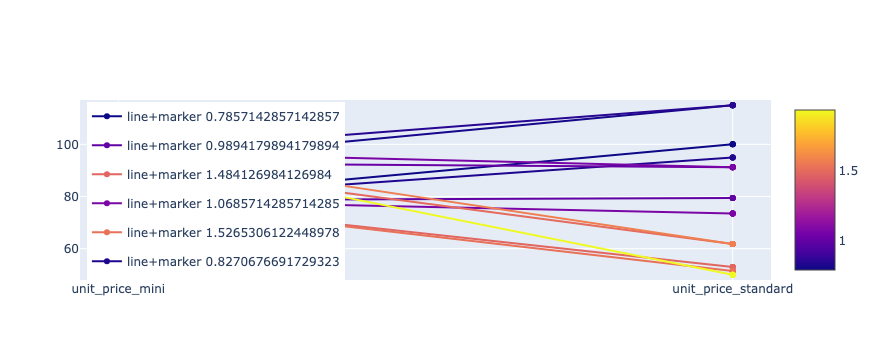

In [95]:
# import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np



df = df[df['brand_name']=='Dior']

# This function allows you to retrieve colors from a continuous color scale
# by providing the name of the color scale, and the normalized location between 0 and 1
# Reference: https://stackoverflow.com/questions/62710057/access-color-from-plotly-color-scale

def get_color(colorscale_name, loc):
    from _plotly_utils.basevalidators import ColorscaleValidator
    # first parameter: Name of the property being validated
    # second parameter: a string, doesn't really matter in our use case
    cv = ColorscaleValidator("colorscale", "")
    # colorscale will be a list of lists: [[loc1, "rgb1"], [loc2, "rgb2"], ...] 
    colorscale = cv.validate_coerce(colorscale_name)
    
    if hasattr(loc, "__iter__"):
        return [get_continuous_color(colorscale, x) for x in loc]
    return get_continuous_color(colorscale, loc)
        

# Identical to Adam's answer
import plotly.colors
from PIL import ImageColor

def get_continuous_color(colorscale, intermed):
    """
    Plotly continuous colorscales assign colors to the range [0, 1]. This function computes the intermediate
    color for any value in that range.

    Plotly doesn't make the colorscales directly accessible in a common format.
    Some are ready to use:
    
        colorscale = plotly.colors.PLOTLY_SCALES["Greens"]

    Others are just swatches that need to be constructed into a colorscale:

        viridis_colors, scale = plotly.colors.convert_colors_to_same_type(plotly.colors.sequential.Viridis)
        colorscale = plotly.colors.make_colorscale(viridis_colors, scale=scale)

    :param colorscale: A plotly continuous colorscale defined with RGB string colors.
    :param intermed: value in the range [0, 1]
    :return: color in rgb string format
    :rtype: str
    """
    if len(colorscale) < 1:
        raise ValueError("colorscale must have at least one color")

    hex_to_rgb = lambda c: "rgb" + str(ImageColor.getcolor(c, "RGB"))

    if intermed <= 0 or len(colorscale) == 1:
        c = colorscale[0][1]
        return c if c[0] != "#" else hex_to_rgb(c)
    if intermed >= 1:
        c = colorscale[-1][1]
        return c if c[0] != "#" else hex_to_rgb(c)

    for cutoff, color in colorscale:
        if intermed > cutoff:
            low_cutoff, low_color = cutoff, color
        else:
            high_cutoff, high_color = cutoff, color
            break

    if (low_color[0] == "#") or (high_color[0] == "#"):
        # some color scale names (such as cividis) returns:
        # [[loc1, "hex1"], [loc2, "hex2"], ...]
        low_color = hex_to_rgb(low_color)
        high_color = hex_to_rgb(high_color)

    return plotly.colors.find_intermediate_color(
        lowcolor=low_color,
        highcolor=high_color,
        intermed=((intermed - low_cutoff) / (high_cutoff - low_cutoff)),
        colortype="rgb",
    )

fig = go.Figure()

## add the lines+markers
for color_val in df.mini_to_standard_ratio.unique():
    color_val_normalized = (color_val - min(df.mini_to_standard_ratio)) / (max(df.mini_to_standard_ratio) - min(df.mini_to_standard_ratio))
    # print(f"color_val={color_val}, color_val_normalized={color_val_normalized}")
    df_subset = df[df['mini_to_standard_ratio'] == color_val]
    fig.add_trace(go.Scatter(
        x=df_subset['variable'],
        y=df_subset['value'],
        mode='lines+markers',
        marker=dict(color=get_color('Plasma', color_val_normalized)),
        name=f"line+marker {color_val}",
        legendgroup=f"line+marker {color_val}"
    ))

## add invisible markers to display the colorbar without displaying the markers
fig.add_trace(go.Scatter(
    x=df['variable'],
    y=df['value'],
    mode='markers',
    marker=dict(
        size=0, 
        color="rgba(0,0,0,0)", 
        colorscale='Plasma', 
        cmin=min(df.mini_to_standard_ratio),
        cmax=max(df.mini_to_standard_ratio),
        colorbar=dict(thickness=40)
    ),
    showlegend=False
))

fig.update_layout(
    legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01),
    yaxis_range=[min(df.value)-2,max(df.value)+2]
)

fig.show()


In [105]:
df_compare = df[df['swatch_group']=='mini size'].merge(
    df[df['swatch_group']=='standard size'],
    on=['product_id','product_name','brand_name'],
    suffixes=('_mini','_standard')
)
# only calculate ratio in one direction 
df_compare = df_compare[df_compare['amount_adj_mini']<df_compare['amount_adj_standard']]
# if ratio < 1, mini is better value per oz, if ratio > 1, standard is better value
df_compare['mini_to_standard_ratio'] = df_compare['unit_price_mini'] / df_compare['unit_price_standard']
# df_compare = df_compare.reset_index().rename(columns={'index':'prod_rank'})


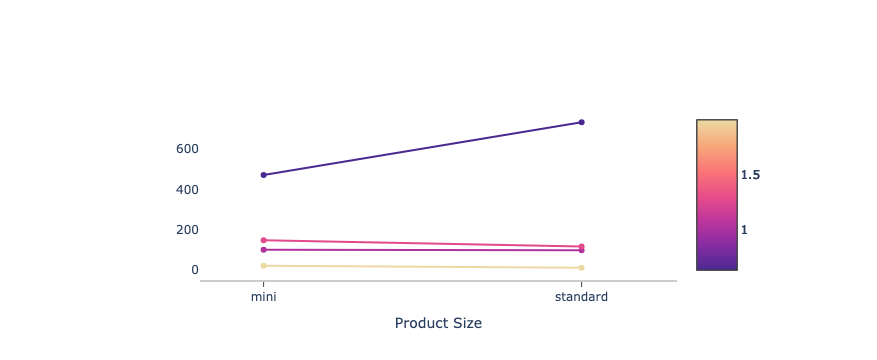

In [210]:
scale='agsunset'

fig = go.Figure()
temp = df_compare[df_compare['brand_name']=='Anastasia Beverly Hills']
for i, row in temp.iterrows():
    
    color_val_normalized = (row['mini_to_standard_ratio'] - min(temp['mini_to_standard_ratio'])) / (max(temp['mini_to_standard_ratio']) - min(temp['mini_to_standard_ratio']))

    
    # line plots
    fig.add_trace(go.Scatter(
        x=['mini','standard'], 
        y=[row['unit_price_mini'], row['unit_price_standard']], 
        mode='lines+markers',
        marker=dict(color=get_color(scale, color_val_normalized)),
    ))
    
    
    ## add invisible markers to display the colorbar without displaying the markers
    fig.add_trace(go.Scatter(
        x=['mini','standard'], 
        y=[row['unit_price_mini'], row['unit_price_standard']], 
        mode='markers',
        marker=dict(
            size=0, 
            color="rgba(0,0,0,0)", 
            colorscale=scale, 
            cmin=min(temp['mini_to_standard_ratio']),
            cmax=max(temp['mini_to_standard_ratio']),
            colorbar=dict(thickness=40)
        ),
        showlegend=False
    ))


    
    
fig.update_layout(
    xaxis=dict(
        title='Product Size',
        type='category',
        tickmode='array',
        ticktext=['Mini','Standard'],
        # really difficult to get categorical axis spacing right
        range=[-0.2, 2 - 0.7],
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside'
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=True,
        showline=False,
        showticklabels=True,
    ),
    autosize=False,
    # width=400,
    # height=600,
    
    margin=dict(
        autoexpand=False,
        l=200,
        r=200,
        t=110,
    ),
    showlegend=False,
    # legend=dict(
    #     yanchor="top",
    #     y=0.99,
    #     xanchor="left",
    #     x=0.01
    # ),
    # yaxis_range=[min(temp['unit_price_mini'])-2,max(temp['unit_price_mini'])+2],
    
    plot_bgcolor='white'
)
    
    
    
# annotations = []
# y_data = df_compare[['unit_price_mini','unit_price_standard']][0:10].values
# labels = df_compare['brand_name'][0:10]
# # Adding labels
# for y_trace, label in zip(y_data, labels):
#     # # labeling the left_side of the plot
#     # annotations.append(dict(xref='paper', x=1, y=y_trace[1],
#     #                               xanchor='right', yanchor='middle',
#     #                               text=label,# + ' {}$/oz.'.format(y_trace[0]),
#     #                               font=dict(family='Arial',
#     #                                         size=10),
#     #                               showarrow=False))

# fig.update_layout(annotations=annotations)

fig.show()